<a href="https://colab.research.google.com/github/MassGH2023/Regression-Models/blob/main/Regulization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regulization techniques

* model complexity versus model error
* Define the terms bias and variance
* Discuss the relationship between model complexity, bias, and variance
* Identify different sources of model error
* Understand the bias-variance tradeoff and how to find the optimal balance between bias, variance, complexity, and error

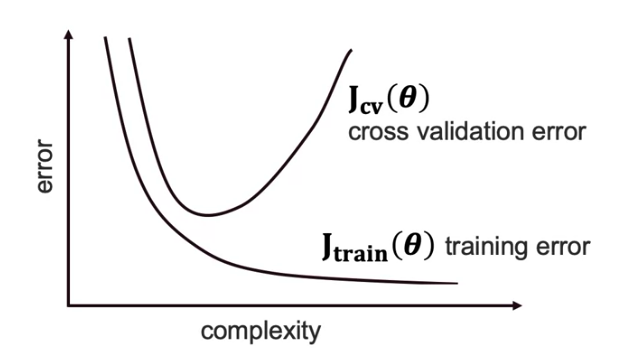


Regularization is a technique used in machine learning to prevent overfitting, which occurs when a model learns the noise in the training data rather than the underlying pattern. It adds a penalty to the loss function based on the complexity of the model. Here are the key points:

Purpose: To reduce overfitting by discouraging overly complex models.
How it works: By adding a regularization term to the loss function, which penalizes large coefficients in the model.
Common types:
        Lasso (L1 regularization): Encourages sparsity in the model by forcing some coefficients to be exactly zero.
        Ridge (L2 regularization): Penalizes the sum of the squares of the coefficients, which helps to keep them small but does not force them to be zero.
        Elastic Net: Combines both Lasso and Ridge regularization.



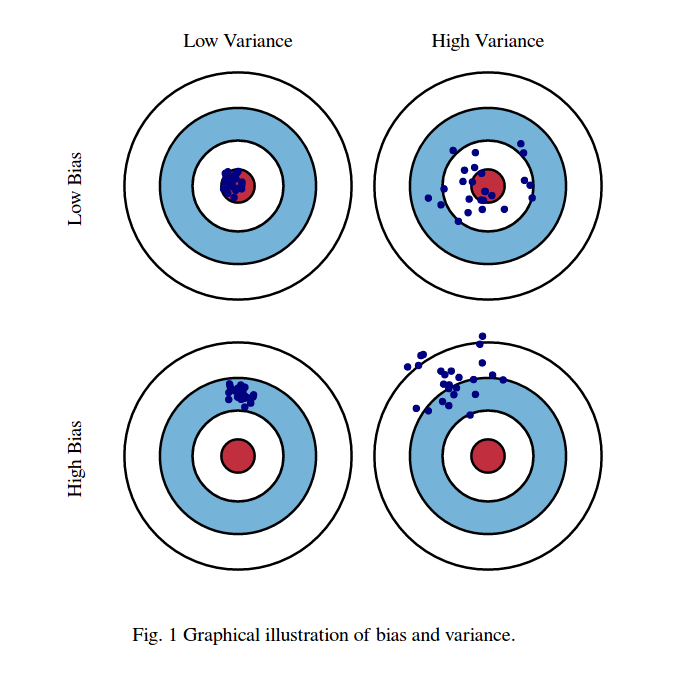

The causes of bias (underfitting) in a model can include:

    Overly simplistic models
    Missing information
    Incorrect assumptions

The causes of variance (overfitting) in a model can include:

    Overly complex models
    Insufficient training data
    Random noise in the data

Ridge or Lasso allow for finer control over the model's complexity. These methods can adjust the influence of each feature or parameter, rather than just changing the overall complexity by selecting a polynomial degree.

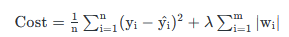


Lambda helps to manage the trade-off between fitting the training data well and keeping the model simple to avoid overfitting.

Ridge reg purpose: The penalty term serves to:

* Shrink Coefficients: It reduces the magnitude of the coefficients, which helps to prevent overfitting by making the model simpler.
* Control Complexity: By adjusting λ, you can control how much you want to penalize large coefficients. A higher λ leads to more significant penalties, resulting in smaller coefficients.


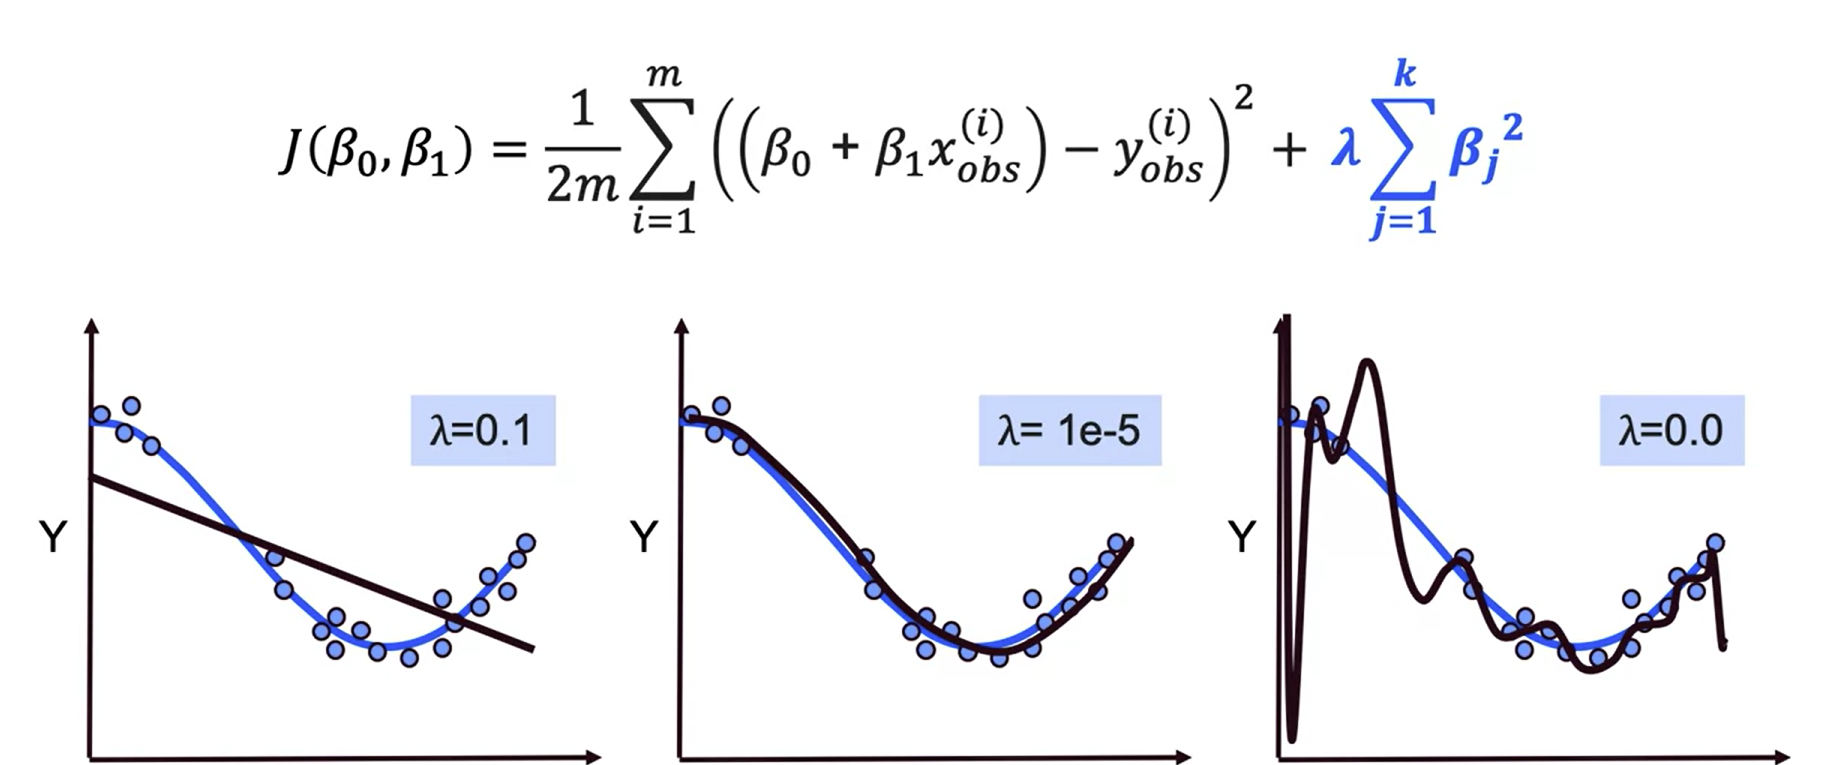


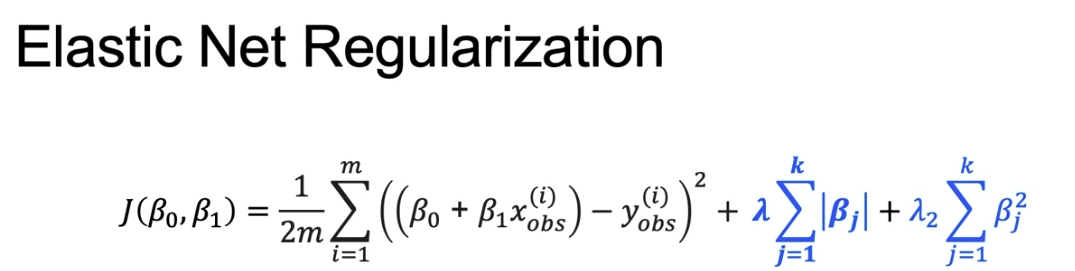

In [2]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso

In [3]:

data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/X_Y_Sinusoid_Data.csv")
data.head()

X_real = np.linspace(0, 1.0, 100)
Y_real = np.sin(2 * np.pi * X_real)

In [4]:
data.head()

,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121


<Figure size 600x800 with 0 Axes>

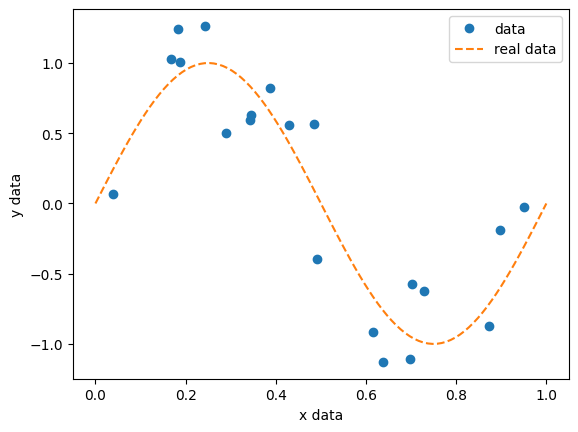

In [20]:
plt.figure(figsize = (6,8))
ax = data.plot('x', 'y', ls = " ", marker = 'o', label = 'data')

ax.plot(X_real, Y_real, ls = "--", marker = "", label = "real data")

ax.legend()
ax.set_xlabel ('x data')
ax.set_ylabel ('y data');
# sns.stripplot(data = data, x = 'x', y = 'y', marker  = 'o', size=10, jitter=False)
# sns.lineplot(x= X_real, y = Y_real)

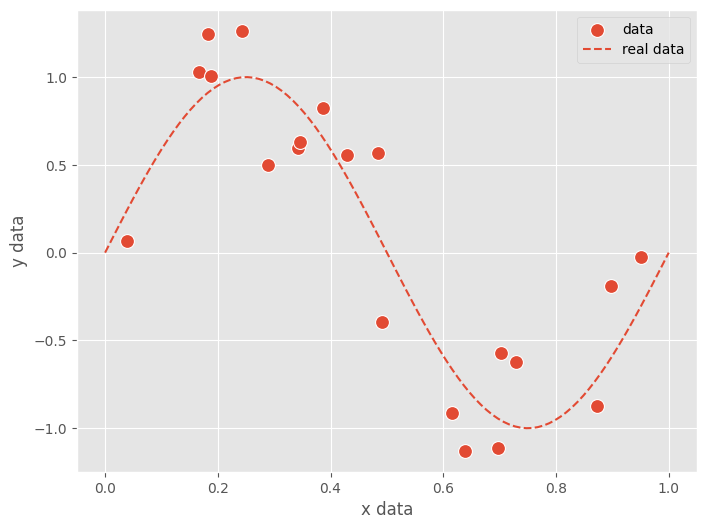

In [23]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))

sns.scatterplot(data=data, x='x', y='y', label='data', marker='o', s=100)

sns.lineplot(x=X_real, y=Y_real, label='real data', linestyle='--')

plt.xlabel('x data')
plt.ylabel('y data')
plt.legend()

plt.show()

In [26]:
pf = PolynomialFeatures(20)
lr = LinearRegression()

X = data[['x']]
y = data['y']

X_poly = pf.fit_transform(X)

lr.fit(X_poly, y)

y_hat = lr.predict(X_poly)

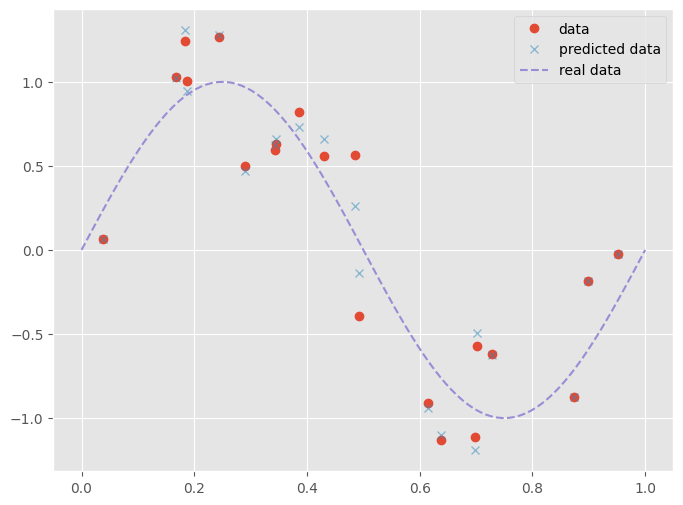

In [29]:
plt.figure(figsize = (8,6))

plt.plot(X, y, ls = "", marker = 'o', label = 'data')
plt.plot(X, y_hat, marker = 'x', ls = '',alpha = 0.5, label = 'predicted data')
plt.plot(X_real, Y_real, marker = '', ls = "--", label = 'real data')
plt.legend()

In [2]:
up = files.upload()


Saving university_admission.csv to university_admission.csv


In [4]:
data = pd.read_csv("university_admission.csv")
data.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GRE_Score            1000 non-null   int64  
 1   TOEFL_Score          1000 non-null   int64  
 2   University_Rating    1000 non-null   int64  
 3   SOP                  1000 non-null   float64
 4   LOR                  1000 non-null   float64
 5   CGPA                 1000 non-null   float64
 6   Research             1000 non-null   int64  
 7   Chance_of_Admission  1000 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 62.6 KB


In [6]:
data.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,316.472000,107.193000,3.114000,3.374000,3.484000,8.57644,0.560000,0.72174
std,11.289494,6.079368,1.142939,0.990507,0.924986,0.60451,0.496635,0.14107
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.80000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.12750,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.56000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.04000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.92000,1.000000,0.97000


In [8]:
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')

In [13]:
pf = PolynomialFeatures(2)
lr = LinearRegression()

target = 'Chance_of_Admission'
X = data.drop(columns = ['Chance_of_Admission'], axis = 1)
y = data['Chance_of_Admission']

<ipython-input-25-1fd4778f5e0b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y);


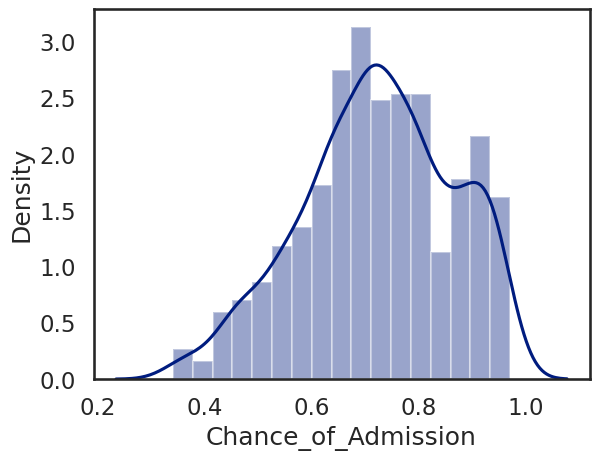

In [25]:
sns.distplot(y);

In [23]:
X_poly = pf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.33, random_state= 11)
lr.fit(X_train, y_train)

y_hat01 = lr.predict(X_test)

r2_score(y_hat01, y_test)


0.774535219232787

In [31]:
ridge = Ridge(alpha = 0.01, max_iter= 100000)
lasso = Lasso(alpha = 0.01, max_iter= 100000)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

y_hat02  = ridge.predict(X_test)
y_hat03 = lasso.predict(X_test)

r2_score(y_hat02, y_test), r2_score(y_hat03, y_test)

(0.7745208806374175, 0.7478243532056632)